In [1]:
import pandas as pd
import numpy as np

df_uts=pd.read_csv('D:\Semester 5\Pembelajaran Mesin\Project UTS\Dataset UTS_Gasal 2425.csv')
df_uts.head(20)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
5,79770,3,no,yes,69,54812,10,5,2018,old,yes,8871,7117,240,no,7,7986665.8,Luxury
6,75985,60,yes,no,67,6517,6,9,2009,new,yes,4878,281,384,yes,5,7607322.9,Luxury
7,64169,88,no,yes,6,61711,3,9,2011,new,yes,3054,129,726,no,9,6420823.1,Middle
8,92383,12,no,no,78,71982,3,7,2000,old,no,7507,9056,892,yes,1,9244344.0,Luxury
9,95121,46,no,yes,3,9382,7,9,1994,old,no,615,1221,328,no,10,9515440.4,Luxury


In [2]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

print("\nPengecekan nilai missing values (null, kosong, NaN):")
missing_values = df_uts.isnull().sum()
empty_strings = (df_uts == '').sum()
nan_values = df_uts.isna().sum()

print("\nMissing values per column:\n", missing_values)
print("\nKolom dengan string kosong:\n", empty_strings)
print("\nNaN values per column:\n", nan_values)

df_uts_numeric = df_uts.select_dtypes(include=['number']) 

Q1 = df_uts_numeric.quantile(0.25)
Q3 = df_uts_numeric.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_uts_numeric < (Q1 - 1.5 * IQR)) | (df_uts_numeric > (Q3 + 1.5 * IQR))).sum()
print("\nOutlier per column:\n", outliers)

duplicates = df_uts.duplicated().sum()
print(f"\nJumlah data duplikat: {duplicates}")

categorical_columns = df_uts.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_uts[col] = le.fit_transform(df_uts[col].astype(str)) 
    label_encoders[col] = le

print("\nData setelah diubah menjadi numerik:\n", df_uts.head())


target = 'category' 
class_distribution = df_uts[target].value_counts()
print("\nDistribusi kelas:\n", class_distribution)

X = df_uts 
y = df_uts[target]  

skf = StratifiedKFold(n_splits=5)

for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"\nFold {fold + 1}: {len(train_index)} data latih, {len(test_index)} data uji")



Pengecekan nilai missing values (null, kosong, NaN):

Missing values per column:
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
category             0
dtype: int64

Kolom dengan string kosong:
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
category             0
dtype: int64

NaN values per column:
 squareme

In [3]:
target = 'category' 

features_to_drop = ['price']

X = df_uts.drop(columns=features_to_drop)
y = df_uts[target]

print("\nFitur (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

print("\nFitur (X) setelah penghapusan kolom Harga:\n", X.head())
print("\nTarget (y):\n", y.head())  

skf = StratifiedKFold(n_splits=5)

for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"\nFold {fold + 1}: {len(train_index)} data latih, {len(test_index)} data uji")


Fitur (X) shape: (10000, 17)
Target (y) shape: (10000,)

Fitur (X) setelah penghapusan kolom Harga:
    squaremeters  numberofrooms  hasyard  haspool  floors  citycode  \
0         75523              3        0        1      63      9373   
1         55712             58        0        1      19     34457   
2         86929            100        1        0      11     98155   
3         51522              3        0        0      61      9047   
4         96470             74        1        0      21     92029   

   citypartrange  numprevowners  made  isnewbuilt  hasstormprotector  \
0              3              8  2005           1                  1   
1              6              8  2021           1                  0   
2              3              4  2003           0                  0   
3              8              3  2012           0                  1   
4              4              2  2011           0                  1   

   basement  attic  garage  hasstorageroom  

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def train_test_split_custom(X, y, test_size, random_state=99):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    print(f"\nTrain-test split dengan rasio {int((1 - test_size) * 100)}:{int(test_size * 100)}")
    print(f"Jumlah data latih: {len(X_train)}")
    print(f"Jumlah data uji: {len(X_test)}\n")
    
    return X_train, X_test, y_train, y_test

split_ratios = [0.2, 0.25, 0.3]

for ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=ratio, random_state=99)  


Train-test split dengan rasio 80:20
Jumlah data latih: 8000
Jumlah data uji: 2000


Train-test split dengan rasio 75:25
Jumlah data latih: 7500
Jumlah data uji: 2500


Train-test split dengan rasio 70:30
Jumlah data latih: 7000
Jumlah data uji: 3000




Evaluasi untuk GradientBoosting:

Menggunakan StandardScaler dan SelectKBest untuk GradientBoosting


C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selec


Parameter terbaik: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50, 'feature_selector__k': 5, 'scaler': StandardScaler()}
Akurasi validasi silang terbaik: 0.9997142857142858
Akurasi set uji: 0.9286666666666666

Laporan klasifikasi:
               precision    recall  f1-score   support

       basic       0.86      1.00      0.92      1303
      luxury       1.00      1.00      1.00       920
      middle       0.99      0.73      0.84       777

    accuracy                           0.93      3000
   macro avg       0.95      0.91      0.92      3000
weighted avg       0.94      0.93      0.93      3000



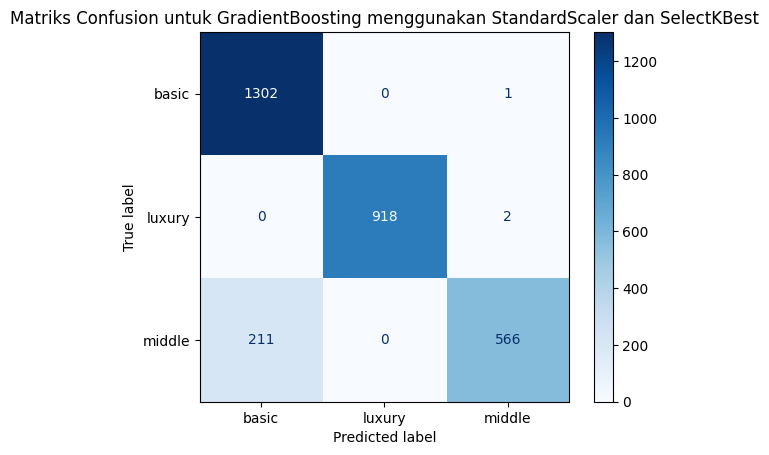

C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw



Fitur yang dipilih: ['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors', 'citycode', 'numprevowners', 'isnewbuilt', 'basement', 'category']

Menggunakan StandardScaler dan SelectPercentile untuk GradientBoosting


C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selec


Parameter terbaik: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50, 'feature_selector__percentile': 10, 'scaler': StandardScaler()}
Akurasi validasi silang terbaik: 0.9997142857142858
Akurasi set uji: 0.9283333333333333

Laporan klasifikasi:
               precision    recall  f1-score   support

       basic       0.86      1.00      0.92      1303
      luxury       1.00      1.00      1.00       920
      middle       0.99      0.73      0.84       777

    accuracy                           0.93      3000
   macro avg       0.95      0.91      0.92      3000
weighted avg       0.94      0.93      0.93      3000



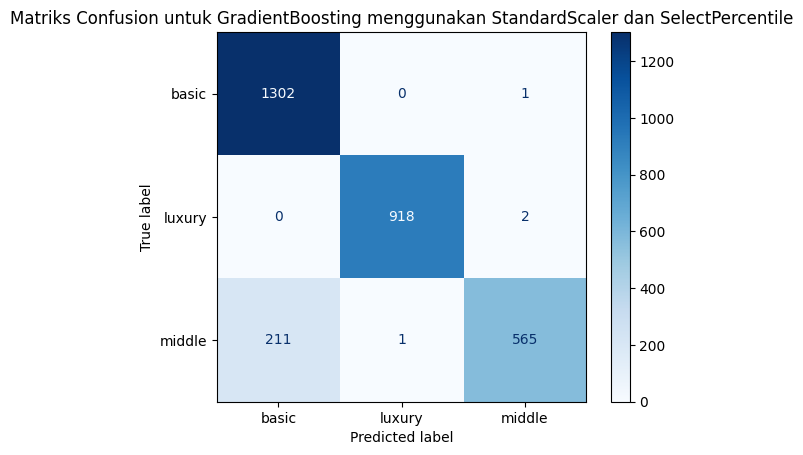

C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw



Fitur yang dipilih: ['squaremeters', 'category']

Menggunakan MinMaxScaler dan SelectKBest untuk GradientBoosting


C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selec


Parameter terbaik: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50, 'feature_selector__k': 5, 'scaler': StandardScaler()}
Akurasi validasi silang terbaik: 0.9997142857142858
Akurasi set uji: 0.9286666666666666

Laporan klasifikasi:
               precision    recall  f1-score   support

       basic       0.86      1.00      0.92      1303
      luxury       1.00      1.00      1.00       920
      middle       0.99      0.73      0.84       777

    accuracy                           0.93      3000
   macro avg       0.95      0.91      0.92      3000
weighted avg       0.94      0.93      0.93      3000



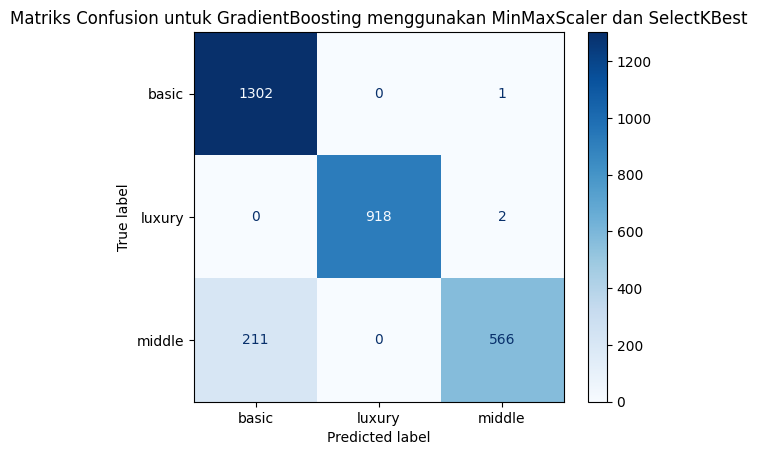


Fitur yang dipilih: ['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors', 'citycode', 'numprevowners', 'isnewbuilt', 'basement', 'category']

Menggunakan MinMaxScaler dan SelectPercentile untuk GradientBoosting


C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selec


Parameter terbaik: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50, 'feature_selector__percentile': 10, 'scaler': StandardScaler()}
Akurasi validasi silang terbaik: 0.9997142857142858
Akurasi set uji: 0.9283333333333333

Laporan klasifikasi:
               precision    recall  f1-score   support

       basic       0.86      1.00      0.92      1303
      luxury       1.00      1.00      1.00       920
      middle       0.99      0.73      0.84       777

    accuracy                           0.93      3000
   macro avg       0.95      0.91      0.92      3000
weighted avg       0.94      0.93      0.93      3000



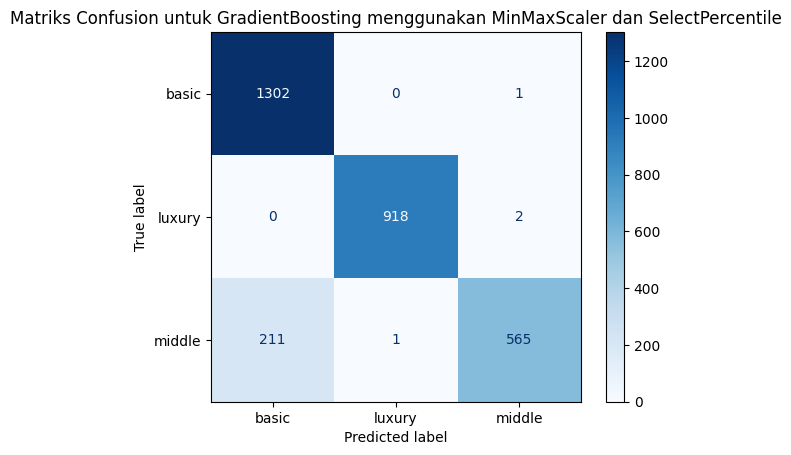

C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw



Fitur yang dipilih: ['squaremeters', 'category']

Evaluasi untuk SVM:

Menggunakan StandardScaler dan SelectKBest untuk SVM


C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selec


Parameter terbaik: {'classifier__C': 0.1, 'classifier__kernel': 'linear', 'feature_selector__k': 5, 'scaler': StandardScaler()}
Akurasi validasi silang terbaik: 1.0
Akurasi set uji: 0.9006666666666666

Laporan klasifikasi:
               precision    recall  f1-score   support

       basic       0.88      0.91      0.89      1303
      luxury       0.99      0.99      0.99       920
      middle       0.83      0.78      0.80       777

    accuracy                           0.90      3000
   macro avg       0.90      0.89      0.90      3000
weighted avg       0.90      0.90      0.90      3000



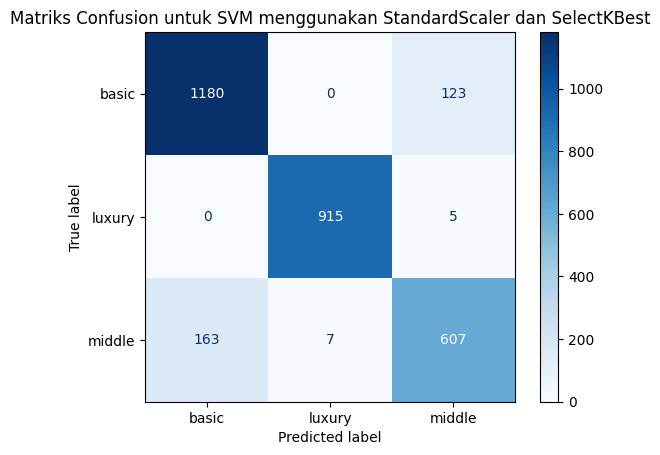

C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw



Fitur yang dipilih: ['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors', 'citycode', 'numprevowners', 'isnewbuilt', 'basement', 'category']

Menggunakan StandardScaler dan SelectPercentile untuk SVM


C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selec


Parameter terbaik: {'classifier__C': 0.1, 'classifier__kernel': 'linear', 'feature_selector__percentile': 10, 'scaler': StandardScaler()}
Akurasi validasi silang terbaik: 1.0
Akurasi set uji: 0.905

Laporan klasifikasi:
               precision    recall  f1-score   support

       basic       0.87      0.92      0.90      1303
      luxury       1.00      0.99      1.00       920
      middle       0.85      0.77      0.81       777

    accuracy                           0.91      3000
   macro avg       0.91      0.90      0.90      3000
weighted avg       0.90      0.91      0.90      3000



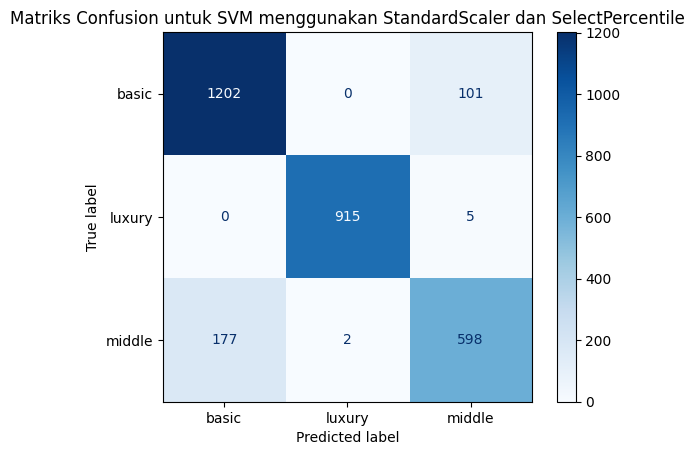

C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw



Fitur yang dipilih: ['squaremeters', 'category']

Menggunakan MinMaxScaler dan SelectKBest untuk SVM


C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selec


Parameter terbaik: {'classifier__C': 0.1, 'classifier__kernel': 'linear', 'feature_selector__k': 5, 'scaler': StandardScaler()}
Akurasi validasi silang terbaik: 1.0
Akurasi set uji: 0.9006666666666666

Laporan klasifikasi:
               precision    recall  f1-score   support

       basic       0.88      0.91      0.89      1303
      luxury       0.99      0.99      0.99       920
      middle       0.83      0.78      0.80       777

    accuracy                           0.90      3000
   macro avg       0.90      0.89      0.90      3000
weighted avg       0.90      0.90      0.90      3000



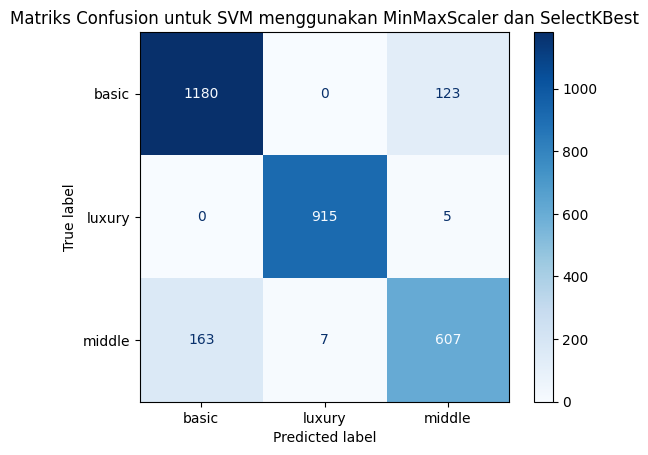

C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selec


Fitur yang dipilih: ['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors', 'citycode', 'numprevowners', 'isnewbuilt', 'basement', 'category']

Menggunakan MinMaxScaler dan SelectPercentile untuk SVM


C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selec


Parameter terbaik: {'classifier__C': 0.1, 'classifier__kernel': 'linear', 'feature_selector__percentile': 10, 'scaler': StandardScaler()}
Akurasi validasi silang terbaik: 1.0
Akurasi set uji: 0.905

Laporan klasifikasi:
               precision    recall  f1-score   support

       basic       0.87      0.92      0.90      1303
      luxury       1.00      0.99      1.00       920
      middle       0.85      0.77      0.81       777

    accuracy                           0.91      3000
   macro avg       0.91      0.90      0.90      3000
weighted avg       0.90      0.91      0.90      3000



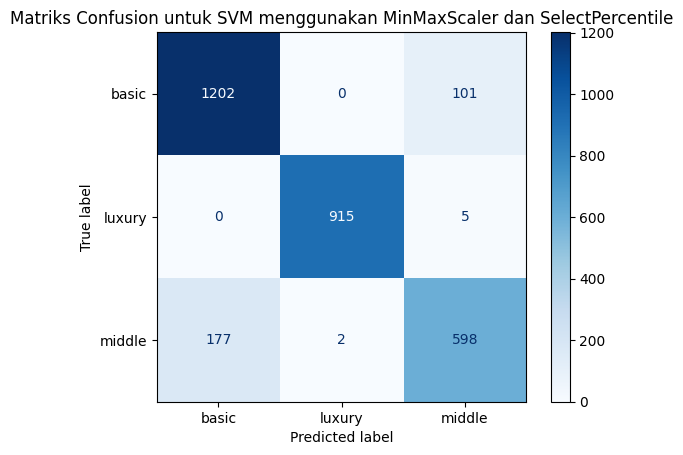


Fitur yang dipilih: ['squaremeters', 'category']


C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd 

classifiers = {
    'GradientBoosting': GradientBoostingClassifier(random_state=99),
    'SVM': SVC(random_state=99)
}

scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler()
}

feature_selectors = {
    'SelectKBest': SelectKBest(f_classif),
    'SelectPercentile': SelectPercentile(f_classif)
}

param_grid = {
    'scaler': list(scalers.values()),
    'feature_selector__k': [5, 10, 15],
    'feature_selector__percentile': [10, 20, 30],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__n_estimators': [50, 100],
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=99)

label_mapping = {0: 'basic', 1: 'luxury', 2: 'middle'}

for classifier_name, classifier in classifiers.items():
    print(f"\nEvaluasi untuk {classifier_name}:")

    for scaler_name, scaler in scalers.items():
        for selector_name, selector in feature_selectors.items():
            print(f"\nMenggunakan {scaler_name} dan {selector_name} untuk {classifier_name}")

            pipeline = Pipeline([
                ('scaler', scaler),
                ('feature_selector', selector),
                ('classifier', classifier)
            ])

            grid_params = param_grid.copy()
            if selector_name == 'SelectKBest':
                grid_params.pop('feature_selector__percentile')
            elif selector_name == 'SelectPercentile':
                grid_params.pop('feature_selector__k')

            if classifier_name == 'GradientBoosting':
                grid_params = {k: v for k, v in grid_params.items() if not k.startswith('classifier__C') and not k.startswith('classifier__kernel')}
            elif classifier_name == 'SVM':
                grid_params = {k: v for k, v in grid_params.items() if not k.startswith('classifier__learning_rate') and not k.startswith('classifier__n_estimators')}

            grid_search = GridSearchCV(pipeline, grid_params, cv=skf, scoring='accuracy')
            grid_search.fit(X_train, y_train)

            print("\nParameter terbaik:", grid_search.best_params_)
            print("Akurasi validasi silang terbaik:", grid_search.best_score_)

            y_pred = grid_search.predict(X_test)

            y_test_mapped = y_test.map(label_mapping)
            y_pred_mapped = pd.Series(y_pred).map(label_mapping)

            print("Akurasi set uji:", accuracy_score(y_test_mapped, y_pred_mapped))
            print("\nLaporan klasifikasi:\n", classification_report(y_test_mapped, y_pred_mapped))

            cm = confusion_matrix(y_test_mapped, y_pred_mapped, labels=['basic', 'luxury', 'middle'])
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['basic', 'luxury', 'middle'])
            disp.plot(cmap='Blues')
            plt.title(f'Matriks Confusion untuk {classifier_name} menggunakan {scaler_name} dan {selector_name}')
            plt.show()

            if selector_name in ['SelectKBest', 'SelectPercentile']:
                selector.fit(X_train, y_train)
                feature_indices = selector.get_support(indices=True)
                selected_features = X_train.columns[feature_indices]
                print("\nFitur yang dipilih:", selected_features.tolist())


In [11]:
import pickle

with open('BestModel_CLF_GBC_Bokeh.pkl','wb') as r:
        pickle.dump((grid_search),r)

print("Model GBT berhasill disimpan")

Model GBT berhasill disimpan
